In [146]:
import numpy as np
import pandas as pd
from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
m=3
k=6

In [3]:
def matrix_func(i, j):
    if i==j:
        return k
    elif j>i:
        return (-1)**j*m/j
    elif i == j+1:
        return m/i
    else:
        return 0

In [4]:
def create_matrix_A(fn, n, dtype=np.float64):
    A = np.zeros((n, n), dtype=dtype)
    for i in range(n):
        for j in range(n):
            A[i, j] = fn(i, j)
    return A

In [17]:
def progressive_difference(x_next, x_curr, epsilon):
    return np.linalg.norm(x_next - x_curr) < epsilon

def relative_difference(A, b, x, epsilon):
    return np.linalg.norm(A @  x - b) < epsilon

def jacobi(A, b, x0, stop_condition, epsilon,max_iterations=1000):
    x = x0
    D = np.diag(A)
    R = A - np.diagflat(D)
    iterations = 0
    for k in range(max_iterations):
        x_next = (b - np.dot(R, x)) / D
        iterations += 1
        if stop_condition=="progressive_difference" and progressive_difference(x_next, x, epsilon):
            break
        elif stop_condition=="relative_difference" and relative_difference(A, b, x, epsilon):
            break
        x = x_next
    return x, iterations

In [41]:
def create_vector_x(n):
    x = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
    return x

def create_start_vector(n, fn):
    vector = [fn() for _ in range(n)]
    return vector

In [7]:
def _error(x1, x2):
    return np.linalg.norm(x1 - x2)

In [8]:
def calc_vector_b(x, A, dtype=np.float64):
    return np.dot(A, x).astype(dtype)

In [9]:
def create_table(data, n_list=None):
    df = pd.DataFrame(data)
    if n_list is not None:
        df = df[df['n'].isin(n_list)]
    display(df)

In [145]:
def create_heatmap(df, xlabel, ylabel, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".5g")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [42]:
def solve_and_return_results(ns, epsilons, stop_condition,max_iterations, fn_start_vector, dtype=np.float64):
    data = {'ns': [], 'epsilons': [], 'iterations': [], 'times': [], 'errors': [], 'solutions':[]}
    for n in ns:
        A = create_matrix_A(matrix_func, n, dtype=dtype)
        x = create_vector_x(n)
        b = calc_vector_b(x, A, dtype=dtype)
        x0 = create_start_vector(n, fn_start_vector)
        for epsilon in epsilons:
            start = perf_counter()
            x_calc, iterations = jacobi(A, b, x0, stop_condition, epsilon,max_iterations)
            end = perf_counter()
            data['ns'].append(n)
            data['epsilons'].append(epsilon)
            data['iterations'].append(iterations)
            data['times'].append(end - start)
            data['errors'].append(_error(x, x_calc))
            data['solutions'].append(x_calc)
    keys = ['iterations', 'times', 'errors', 'solutions']
    results_table = {}
    for key in keys:
        results_table[key] = pd.DataFrame(data).pivot(index='ns', columns='epsilons', values=key)
    return results_table, data


In [57]:
def solve_and_return_results_v0(v_0s, epsilons, stop_condition,max_iterations, n, dtype=np.float64):
    data = {'v_0': [], 'epsilons': [], 'iterations': [], 'times': [], 'errors': [], 'solutions':[]}
    for fn_start_vector in v_0s:
        A = create_matrix_A(matrix_func, n, dtype=dtype)
        x = create_vector_x(n)
        b = calc_vector_b(x, A, dtype=dtype)
        x0 = create_start_vector(n, fn_start_vector)
        for epsilon in epsilons:
            start = perf_counter()
            x_calc, iterations = jacobi(A, b, x0, stop_condition, epsilon,max_iterations)
            end = perf_counter()
            data['v_0'].append(fn_start_vector())
            data['epsilons'].append(epsilon)
            data['iterations'].append(iterations)
            data['times'].append(end - start)
            data['errors'].append(_error(x, x_calc))
            data['solutions'].append(x_calc)
    keys = ['iterations', 'times', 'errors', 'solutions']
    results_table = {}
    for key in keys:
        results_table[key] = pd.DataFrame(data).pivot(index='v_0', columns='epsilons', values=key)
    return results_table, data


In [101]:
# ns = range(2, 201)
ns = [2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,75,100,150,200]
ns = [2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,75,80,85,90,95,96,97,98,99,100,150,200,300,400,500]
epsilons = [1e-1, 1e-2,1e-3,1e-5, 1e-8, 1e-11]
stop_condition1 = "progressive_difference"
stop_condition2 = "relative_difference"
max_iterations = 1000
# start_vector_fn = lambda i: random.randint(-10e10, 10e10)
start_vector_fn = lambda: 0
v_0_s = [lambda i=i: i for i in [0,1e1, 1e2, 1e3,1e4, 1e5, 1e8, 1e10, 1e15]]

In [105]:
results1, data1 = solve_and_return_results(ns, epsilons, stop_condition1,max_iterations, start_vector_fn)
results2, data2 = solve_and_return_results(ns, epsilons, stop_condition2,max_iterations, start_vector_fn)
display(results1['iterations'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
ns,,,,,,
2,39,29,19,12,9,5
3,35,26,17,11,9,6
4,34,25,17,11,9,6
5,33,25,17,11,9,6
6,34,25,17,12,9,6
7,34,26,17,12,9,6
8,34,26,17,12,9,6
9,34,26,17,12,9,6
10,34,26,17,12,9,6


In [27]:
display(results2['iterations'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
ns,,,,,,
2,41,31,21,15,11,8
3,37,29,20,14,11,8
4,36,27,19,13,11,8
5,36,27,19,13,11,8
6,36,28,19,14,11,8
7,36,28,20,14,11,8
8,36,28,20,14,11,8
9,36,28,20,14,11,8
10,36,28,20,14,11,9


In [28]:
display(results1['errors'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
ns,,,,,,
2,5.144879e-12,5.268356e-09,0.000005,0.000691,0.005524,0.088388
3,6.312525e-12,7.111877e-09,0.000008,0.001023,0.005198,0.043443
4,5.185696e-12,9.223644e-09,0.000006,0.000884,0.005065,0.048902
5,8.839116e-12,9.157761e-09,0.000006,0.001016,0.005890,0.057357
6,5.649523e-12,1.050748e-08,0.000007,0.000501,0.006585,0.063905
7,6.248720e-12,3.981147e-09,0.000007,0.000546,0.007203,0.069895
8,6.683963e-12,4.223578e-09,0.000008,0.000578,0.007712,0.074956
9,7.092627e-12,4.463956e-09,0.000008,0.000611,0.008188,0.079618
10,7.442881e-12,4.659048e-09,0.000008,0.000637,0.008595,0.083709


In [29]:
display(results2['errors'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
ns,,,,,,
2,1.286220e-12,1.317089e-09,1.348699e-06,0.000086,0.001381,0.011049
3,1.345548e-12,8.372509e-10,9.266973e-07,0.000105,0.001023,0.009201
4,8.925716e-13,1.598710e-09,1.248478e-06,0.000153,0.000884,0.009235
5,8.298732e-13,1.602883e-09,1.218047e-06,0.000172,0.001016,0.010720
6,9.910341e-13,7.540986e-10,1.346072e-06,0.000101,0.001149,0.011831
7,1.098517e-12,8.284101e-10,6.674583e-07,0.000111,0.001259,0.012894
8,1.178788e-12,8.774257e-10,7.171674e-07,0.000118,0.001353,0.013729
9,1.252952e-12,9.264317e-10,7.627980e-07,0.000125,0.001438,0.014541
10,1.318523e-12,9.654336e-10,8.030134e-07,0.000130,0.001514,0.008595


In [30]:
display(results1['times'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
ns,,,,,,
2,0.000254,0.000193,0.000116,0.000058,0.000050,0.000134
3,0.000176,0.000160,0.000118,0.000081,0.000077,0.000062
4,0.000141,0.000108,0.000075,0.000052,0.000046,0.000036
5,0.000138,0.000107,0.000076,0.000052,0.000045,0.000035
6,0.000143,0.000114,0.000076,0.000057,0.000045,0.000035
7,0.000141,0.000111,0.000076,0.000057,0.000047,0.000036
8,0.000172,0.000115,0.000075,0.000056,0.000046,0.000036
9,0.000144,0.000114,0.000173,0.000090,0.000071,0.000052
10,0.000144,0.000112,0.000078,0.000058,0.000048,0.000038


In [32]:
display(results2['times'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
ns,,,,,,
2,0.000218,0.000169,0.000118,0.000090,0.000077,0.000847
3,0.000197,0.000157,0.000112,0.000082,0.000067,0.000055
4,0.000192,0.000148,0.000106,0.000077,0.000067,0.000054
5,0.000195,0.000148,0.000107,0.000077,0.000067,0.000053
6,0.000196,0.000155,0.000109,0.000084,0.000069,0.000055
7,0.000195,0.000156,0.000113,0.000083,0.000068,0.000055
8,0.000194,0.000155,0.000113,0.000083,0.000069,0.000055
9,0.000198,0.000158,0.000117,0.000085,0.000070,0.000057
10,0.000195,0.000155,0.000115,0.000084,0.000069,0.000061


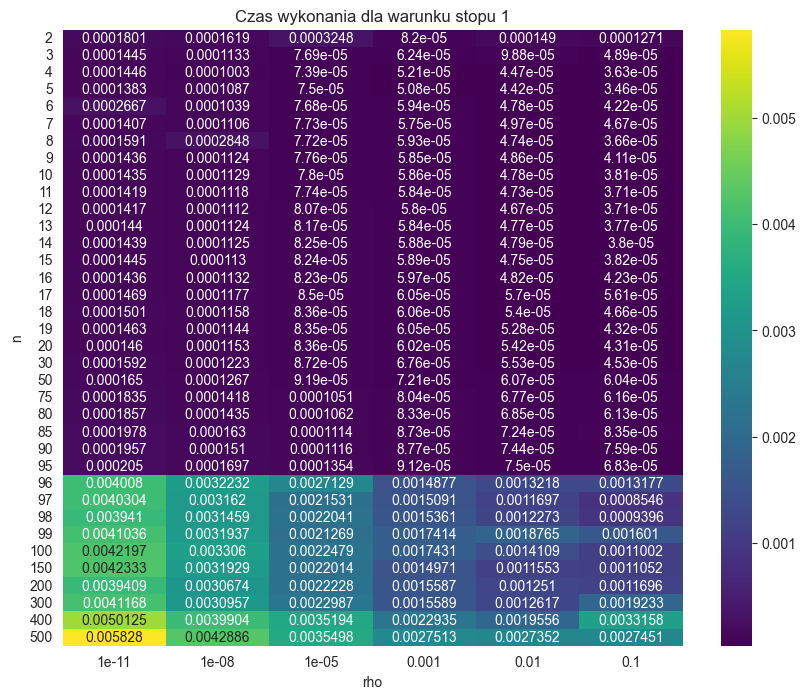

In [109]:
create_heatmap(results1['times'], 'rho', 'n', 'Czas wykonania dla warunku stopu 1')

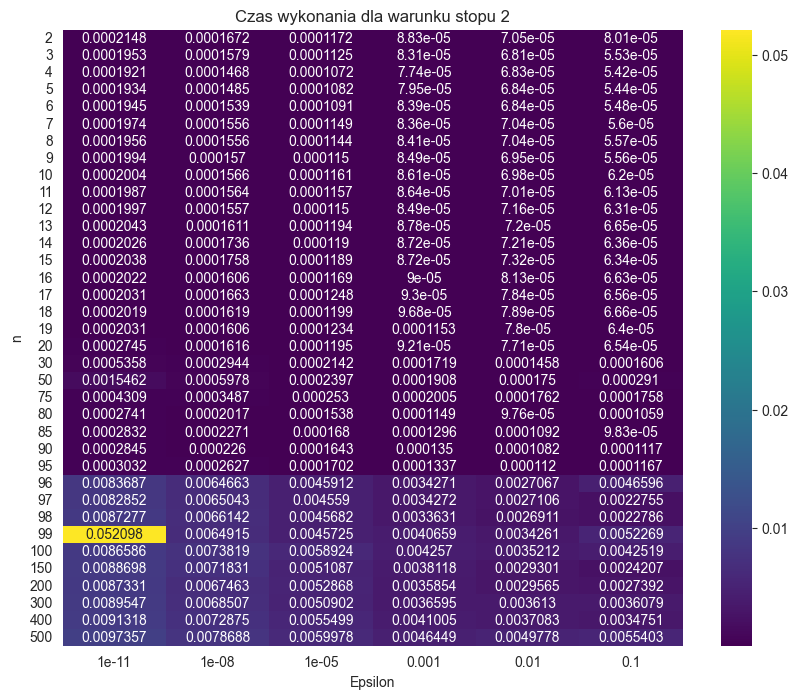

In [107]:
create_heatmap(results2['times'], '\rho', 'n', 'Czas wykonania dla warunku stopu 2')

In [115]:
results3_1, _ = solve_and_return_results_v0(v_0_s, epsilons, stop_condition1,max_iterations, 50)
results3_2, _ = solve_and_return_results_v0(v_0_s, epsilons, stop_condition2,max_iterations, 50)
display(results3_1['iterations'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,35,26,18,13,10,7
1.000000e+01,36,28,19,14,11,8
1.000000e+02,39,30,22,16,14,11
1.000000e+03,41,33,25,19,16,14
1.000000e+04,44,36,27,22,19,16
1.000000e+05,47,39,30,25,22,19
1.000000e+08,55,47,39,33,30,27
1.000000e+10,61,52,44,39,36,33
1.000000e+15,74,66,58,52,50,47


In [74]:
display(results3_2['iterations'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,37,29,20,15,12,9
1.000000e+01,38,30,21,16,13,10
1.000000e+02,41,32,24,18,16,13
1.000000e+03,43,35,27,21,18,16
1.000000e+04,46,38,30,24,21,18
1.000000e+05,49,41,32,27,24,21
1.000000e+08,57,49,41,35,32,30
1.000000e+10,63,54,46,41,38,35
1.000000e+15,77,68,60,54,52,49


In [75]:
display(results3_1['errors'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,4.344167e-12,7.845036e-09,0.000008,0.000465,0.005068,0.079306
1.000000e+01,5.290065e-12,4.185502e-09,0.000008,0.000438,0.006195,0.084493
1.000000e+02,3.948066e-12,7.465859e-09,0.000006,0.000781,0.004525,0.052958
1.000000e+03,6.847489e-12,6.919747e-09,0.000004,0.000816,0.007878,0.045853
1.000000e+04,7.077624e-12,4.496676e-09,0.000008,0.000616,0.008164,0.078861
1.000000e+05,5.261217e-12,4.007237e-09,0.000008,0.000424,0.006160,0.081642
1.000000e+08,6.607062e-12,5.261287e-09,0.000004,0.000692,0.007576,0.080671
1.000000e+10,3.848189e-12,6.921117e-09,0.000007,0.000401,0.004496,0.069195
1.000000e+15,9.209089e-12,5.964056e-09,0.000006,0.000692,0.003673,0.052613


In [76]:
display(results3_2['errors'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,8.959839e-13,7.660791e-10,1.441995e-06,0.000079,0.001049,0.015016
1.000000e+01,1.087579e-12,7.126991e-10,1.342589e-06,0.000082,0.001269,0.014894
1.000000e+02,6.781984e-13,1.271282e-09,1.255144e-06,0.000146,0.000781,0.011054
1.000000e+03,1.254331e-12,1.309137e-09,8.069723e-07,0.000143,0.001458,0.007878
1.000000e+04,1.245227e-12,9.351824e-10,7.574549e-07,0.000125,0.001429,0.014581
1.000000e+05,1.074126e-12,6.855708e-10,1.287778e-06,0.000081,0.001252,0.014296
1.000000e+08,1.121999e-12,1.073970e-09,6.855788e-07,0.000131,0.001288,0.007576
1.000000e+10,7.983215e-13,1.417132e-09,1.245678e-06,0.000069,0.000935,0.013100
1.000000e+15,5.944679e-13,1.080790e-09,1.132945e-06,0.000142,0.000692,0.010740


In [77]:
display(results3_1['times'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,0.000407,0.000197,0.000146,0.000129,0.000374,0.000710
1.000000e+01,0.000171,0.000154,0.000091,0.000071,0.000064,0.000080
1.000000e+02,0.000172,0.000135,0.000105,0.000079,0.000076,0.000079
1.000000e+03,0.000181,0.000152,0.000130,0.000097,0.000082,0.000076
1.000000e+04,0.000193,0.000164,0.000127,0.000125,0.000327,0.000086
1.000000e+05,0.000203,0.000172,0.000135,0.000116,0.000104,0.000102
1.000000e+08,0.000235,0.000203,0.000171,0.000149,0.000136,0.000125
1.000000e+10,0.000298,0.000264,0.000198,0.000173,0.000161,0.000155
1.000000e+15,0.000339,0.000281,0.000247,0.000224,0.000217,0.000230


In [78]:
display(results3_2['times'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,0.000226,0.000182,0.000131,0.000103,0.000089,0.000094
1.000000e+01,0.000230,0.000259,0.000135,0.000105,0.000090,0.000081
1.000000e+02,0.000239,0.000193,0.000154,0.000130,0.000109,0.000104
1.000000e+03,0.000250,0.000206,0.000162,0.000130,0.000113,0.000104
1.000000e+04,0.000292,0.000232,0.000181,0.000147,0.000131,0.000121
1.000000e+05,0.000285,0.000240,0.000190,0.000162,0.000149,0.000133
1.000000e+08,0.000327,0.000283,0.000240,0.000208,0.000193,0.000182
1.000000e+10,0.000361,0.000310,0.000267,0.000240,0.000224,0.000207
1.000000e+15,0.000437,0.000389,0.000343,0.000311,0.000302,0.000298


In [167]:
results3_1, _ = solve_and_return_results_v0(v_0_s, epsilons, stop_condition1,max_iterations, 100)
results3_2, _ = solve_and_return_results_v0(v_0_s, epsilons, stop_condition2,max_iterations, 100)

In [170]:
display(results3_1['iterations'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,35,27,18,13,10,7
1.000000e+01,36,28,19,14,11,8
1.000000e+02,39,30,22,16,14,11
1.000000e+03,41,33,25,19,16,14
1.000000e+04,44,36,27,22,19,16
1.000000e+05,47,39,30,25,22,19
1.000000e+08,55,47,39,33,30,27
1.000000e+10,61,52,44,39,36,33
1.000000e+15,74,66,58,52,50,47


In [171]:
display(results3_2['iterations'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,37,29,20,15,12,10
1.000000e+01,38,30,21,16,13,10
1.000000e+02,41,32,24,18,16,13
1.000000e+03,43,35,27,21,18,16
1.000000e+04,46,38,30,24,21,18
1.000000e+05,49,41,32,27,24,21
1.000000e+08,57,49,41,35,32,30
1.000000e+10,63,54,46,41,38,35
1.000000e+15,77,68,60,54,52,49


In [172]:
display(results3_1['errors'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,5.106359e-12,5.211245e-09,0.000010,0.000557,0.005951,0.093450
1.000000e+01,5.611139e-12,4.314133e-09,0.000008,0.000455,0.006570,0.087867
1.000000e+02,3.973536e-12,7.515048e-09,0.000006,0.000786,0.004555,0.053293
1.000000e+03,6.893043e-12,6.950430e-09,0.000004,0.000821,0.007929,0.046184
1.000000e+04,7.118999e-12,4.511407e-09,0.000008,0.000618,0.008213,0.079371
1.000000e+05,5.276503e-12,4.036575e-09,0.000008,0.000426,0.006178,0.082135
1.000000e+08,6.654626e-12,5.276212e-09,0.000004,0.000695,0.007631,0.080972
1.000000e+10,3.861461e-12,6.948317e-09,0.000007,0.000404,0.004511,0.069488
1.000000e+15,9.242633e-12,6.004519e-09,0.000006,0.000695,0.003695,0.052762


In [173]:
display(results3_2['errors'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,1.046754e-12,9.160998e-10,1.722099e-06,0.000095,0.001226,0.005951
1.000000e+01,1.148047e-12,7.370449e-10,1.385554e-06,0.000086,0.001338,0.015385
1.000000e+02,6.828206e-13,1.279627e-09,1.263163e-06,0.000147,0.000786,0.011123
1.000000e+03,1.259960e-12,1.316477e-09,8.101531e-07,0.000144,0.001465,0.007929
1.000000e+04,1.254566e-12,9.377566e-10,7.629303e-07,0.000126,0.001440,0.014644
1.000000e+05,1.077605e-12,6.901177e-10,1.296811e-06,0.000081,0.001257,0.014397
1.000000e+08,1.130009e-12,1.077992e-09,6.901259e-07,0.000132,0.001297,0.007631
1.000000e+10,8.000540e-13,1.421017e-09,1.254370e-06,0.000069,0.000938,0.013172
1.000000e+15,5.968603e-13,1.085977e-09,1.139056e-06,0.000142,0.000695,0.010780


In [174]:
display(results3_1['times'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,0.004259,0.003249,0.002164,0.001534,0.001744,0.001249
1.000000e+01,0.004322,0.004479,0.002226,0.001713,0.001250,0.000989
1.000000e+02,0.005251,0.003645,0.003306,0.001975,0.001799,0.001343
1.000000e+03,0.005252,0.004031,0.002995,0.002286,0.002006,0.001939
1.000000e+04,0.005239,0.004194,0.003230,0.002521,0.002277,0.001976
1.000000e+05,0.005571,0.004582,0.003583,0.002931,0.002534,0.002290
1.000000e+08,0.006631,0.005836,0.004965,0.005940,0.003565,0.003416
1.000000e+10,0.008186,0.006262,0.005394,0.004834,0.004625,0.004271
1.000000e+15,0.008713,0.007853,0.007151,0.006486,0.006276,0.005856


In [175]:
display(results3_2['times'])

epsilons,1.000000e-11,1.000000e-08,1.000000e-05,1.000000e-03,1.000000e-02,1.000000e-01
v_0,,,,,,
0.000000e+00,0.008327,0.006578,0.004571,0.003602,0.002886,0.002477
1.000000e+01,0.008955,0.006793,0.004901,0.003640,0.002960,0.002348
1.000000e+02,0.009412,0.007517,0.005528,0.005006,0.006118,0.003586
1.000000e+03,0.009703,0.008079,0.015730,0.005037,0.004235,0.003590
1.000000e+04,0.010125,0.008473,0.006753,0.005369,0.004661,0.004031
1.000000e+05,0.010787,0.008907,0.006996,0.005942,0.005310,0.004731
1.000000e+08,0.014850,0.011423,0.009676,0.008099,0.008029,0.006785
1.000000e+10,0.015211,0.012357,0.010439,0.009108,0.010019,0.007934
1.000000e+15,0.018471,0.016235,0.014416,0.012682,0.012166,0.011629


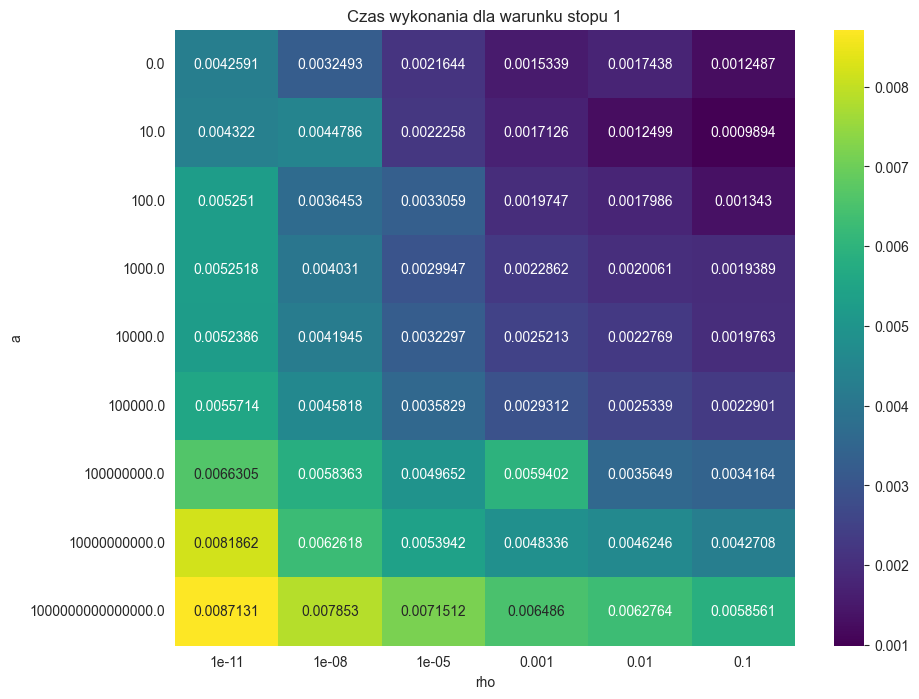

In [168]:
create_heatmap(results3_1['times'], 'rho', 'a', 'Czas wykonania dla warunku stopu 1')

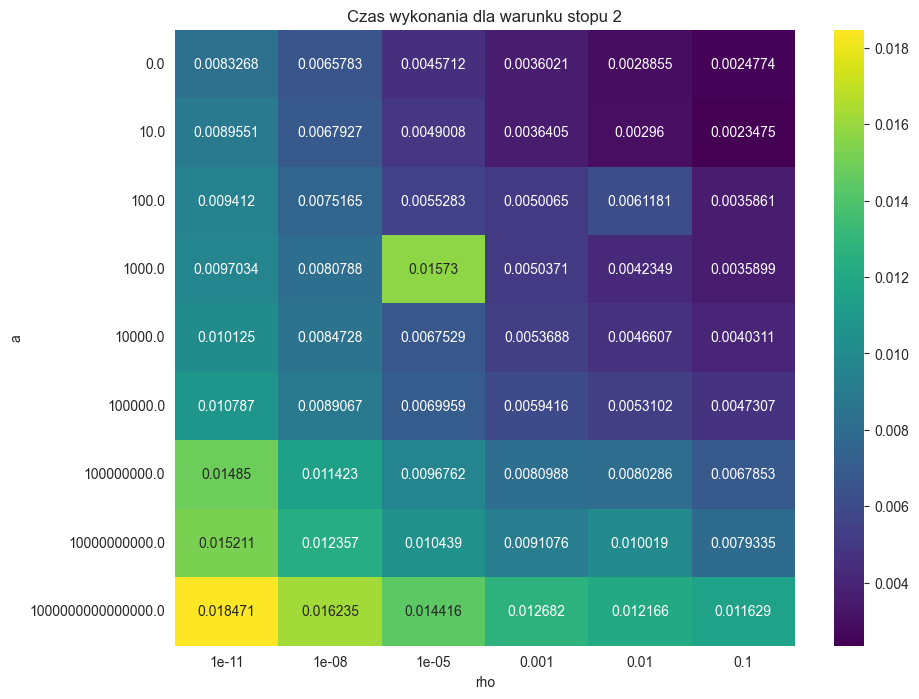

In [176]:
create_heatmap(results3_2['times'], 'rho', 'a', 'Czas wykonania dla warunku stopu 2')

In [ ]:
#exercise 2

In [79]:
def spectral_radius(n):
    A = create_matrix_A(matrix_func, n)
    B = np.diagflat(np.diag(A))
    I = np.eye(n)
    M = I - np.linalg.inv(B) @ A
    return max(abs(np.linalg.eigvals(M)))
# def spectral_radius(n):
#     A = create_matrix_A(matrix_func, n)
#     D = np.diag(A)
#     R = A - np.diagflat(D)
#     S = R / D
#     eigvals = np.linalg.eigvals(S)
#     return max(abs(i) for i in eigvals)

In [82]:
def spectral_radius_data(ns):
    data = {'ns': [], 'spectral_radius': [], 'fullfill condition': []}
    for n in ns:
        data['ns'].append(n)
        data['spectral_radius'].append(spectral_radius(n))
        data['fullfill condition'].append("Prawda" if spectral_radius(n) < 1 else "Fałsz")
    return pd.DataFrame(data)

In [83]:
spectral_radius_data(ns)

,ns,spectral_radius,fullfill condition
0,2,0.500000,Prawda
1,3,0.457937,Prawda
2,4,0.438318,Prawda
3,5,0.433127,Prawda
4,6,0.433739,Prawda
5,7,0.433957,Prawda
6,8,0.433954,Prawda
7,9,0.433949,Prawda
8,10,0.433949,Prawda
9,11,0.433949,Prawda
